# Problem 1





In [6]:
from matplotlib import pyplot as mp
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

%matplotlib inline

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))



In [2]:
df = pd.read_csv('HW2_Data/DF1', index_col=0)

In [3]:
df.head()

,0,1,2,3
0,1.038502,0.899865,0.835053,-0.971528
1,0.320455,-0.647459,0.149079,0.352593
2,0.055480,2.234771,0.271672,-2.108739
3,-0.007260,-0.524299,-0.126550,0.670827
4,-1.237390,-1.377017,-1.049932,1.342079


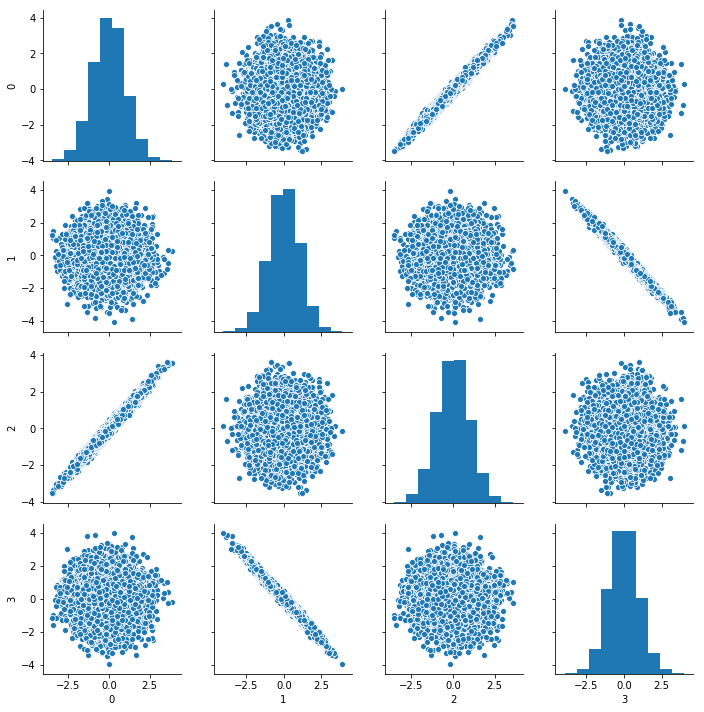

In [4]:
# Seaborn Pairplot
sns.pairplot(df)

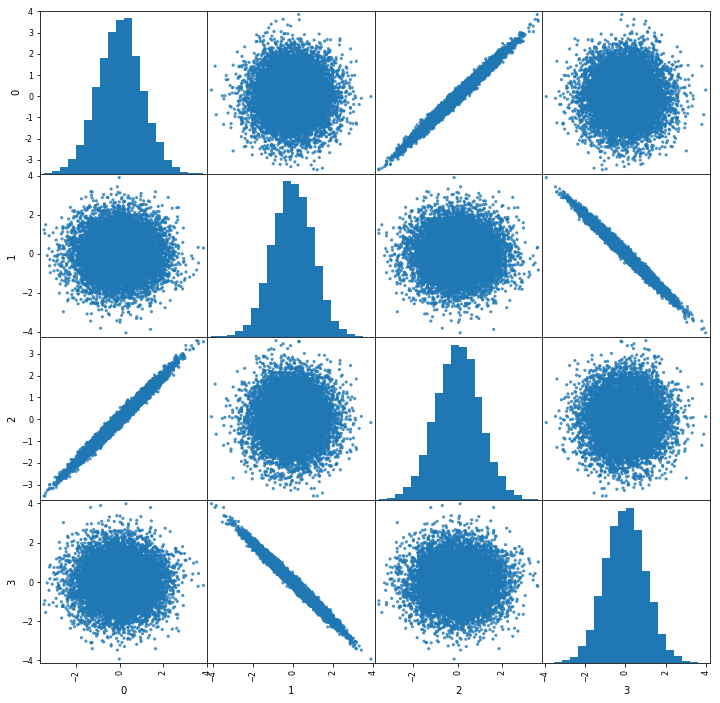

In [5]:
# Pandas scatter pairplot
scatter_pairplot = pd.plotting.scatter_matrix(df, figsize=(12,12), marker='o',
                                 hist_kwds={'bins': 20}, s=10, alpha=.8)

#### 0 and 2, 1 and 3 correlated

In [6]:
df.head(10)

,0,1,2,3
0,1.038502,0.899865,0.835053,-0.971528
1,0.320455,-0.647459,0.149079,0.352593
2,0.055480,2.234771,0.271672,-2.108739
3,-0.007260,-0.524299,-0.126550,0.670827
4,-1.237390,-1.377017,-1.049932,1.342079
5,0.477841,0.032660,0.336723,-0.171675
6,-0.486923,-1.128336,-0.459850,1.113013
7,0.313020,0.677323,0.123082,-0.617958
8,0.919790,-0.539665,0.956577,0.821389
9,0.574238,-1.024339,0.471622,1.006623


In [7]:
covar = df.cov()
covar

,0,1,2,3
0,1.001558,-0.004012,0.991624,0.004125
1,-0.004012,1.005378,-0.004099,-0.995457
2,0.991624,-0.004099,1.001589,0.004081
3,0.004125,-0.995457,0.004081,1.005168


In [8]:
cov111 = np.array([[1,0,0],[0,1,0.5],[0,0.5,1]])

In [15]:
covariances = []

n1 = [5,50,100,250,500,1000,2000]

for n in n1:
    var = np.random.multivariate_normal(mean=[0,0,0], cov=cov111, size=n)
    found_cov = np.cov(var.T)[1][2]
    covariances.append([found_cov,0.5])

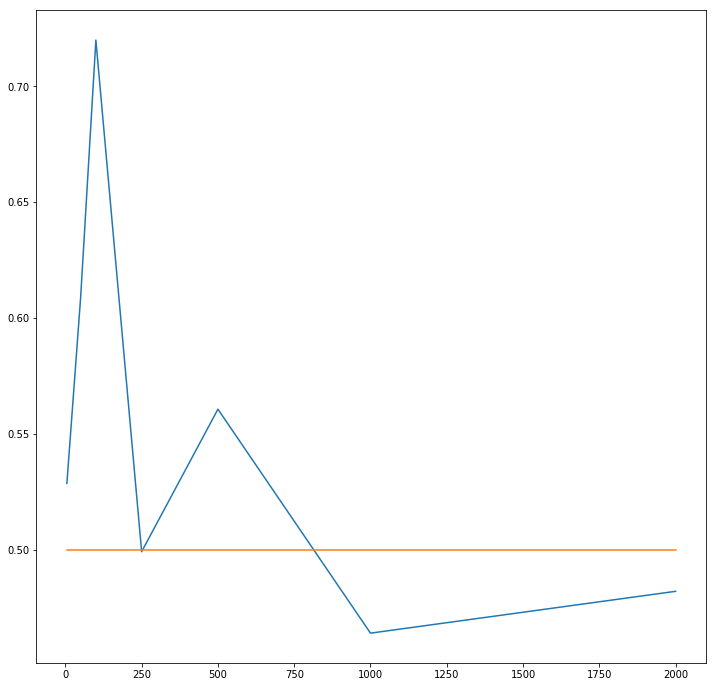

In [16]:
plt.figure(figsize = (12,12))
plt.plot([i for i in n1],covariances)
plt.show()

In [2]:
import numpy as np

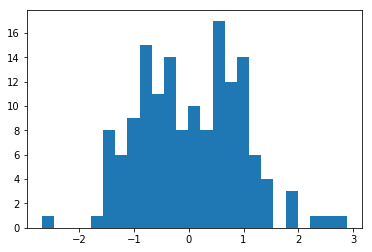

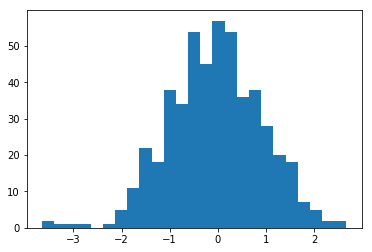

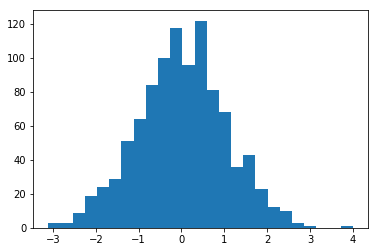

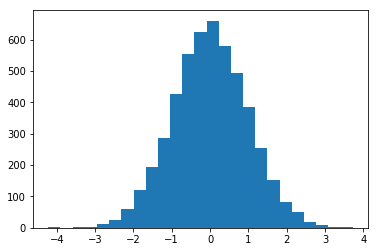

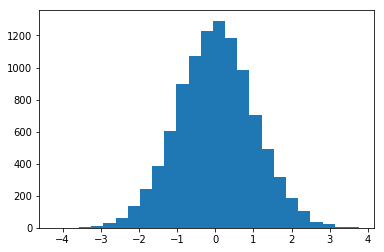

[-0.07028251932994074, -0.10709892891943974, -0.026385506259257535, 0.03595419396228359, 0.019081300718371465]
[0.0823506355969192, 0.04191658929655667, 0.033654101814084264, 0.014017533589314712, 0.010121120172272848]


In [65]:
n=[150,500,1000,5000,10000]

beta_hat_list = []
std_err_list = []


for i in n:
    X = np.random.normal(0,1,i)
    e = np.random.normal(0,1,i)
    plt.hist(e, 25)
    plt.show()
    y = e-3
    beta = sum([x*y for x,y in zip(X,y)])
    beta_hat = beta/sum([x*y for x,y in zip(X,X)])
    std_error = np.sqrt(np.var(e)/sum([x*y for x,y in zip(X,X)]))
    
    beta_hat_list.append(beta_hat)
    std_err_list.append(std_error)

print(beta_hat_list)
print(std_err_list)

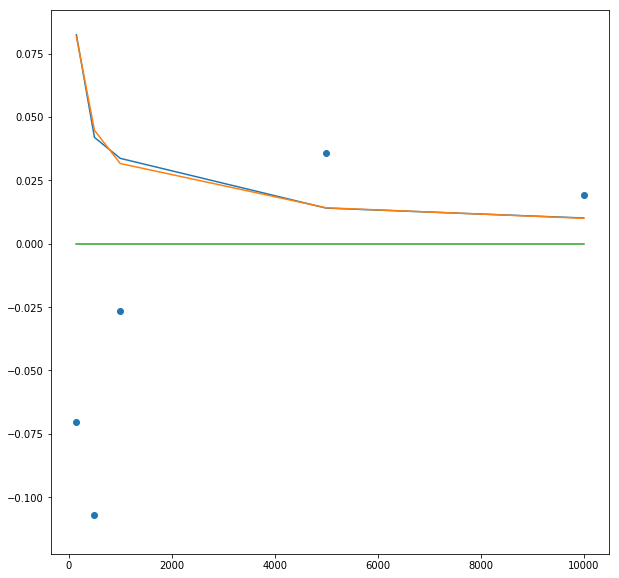

In [71]:
beta_hat_list
plt.figure(figsize=(10,10))
plt.scatter(n,beta_hat_list)
plt.plot(n,std_err_list)
plt.plot(n,1/np.sqrt(n))
plt.plot(n,np.zeros(len(n)))
plt.show()

In [ ]:
y = e-3
y

In [ ]:
beta = sum([x*y for x,y in zip(X,y)])

In [ ]:
beta_hat = beta/sum([x*y for x,y in zip(X,X)])

In [ ]:
beta_hat

In [ ]:
e_var = np.var(e)

In [ ]:
std_error = np.sqrt(e_var/sum([x*y for x,y in zip(X,X)]))
std_error

In [ ]:
plt.hist(e, 25)
plt.show()

## Q4

### Answer 4.1

In [74]:
# To display top n frequent names of year - taking input of n and Year

year=input("Enter year(YYYY):")
number=int(input("Display number:"))

Enter year(YYYY):2000
Display number:10


In [518]:
# Reading the specified year's file
df = pd.read_csv('Names/yob{}.txt'.format(year),header=None)
df.head()

,0,1,2
0,Emily,F,25953
1,Hannah,F,23075
2,Madison,F,19967
3,Ashley,F,17997
4,Sarah,F,17689


In [528]:
df_sorted = df.sort_values(2, ascending=False)
df_sorted.columns=['Name', 'Gender', 'Count/Frequency']
df_sorted.head(number)

,Name,Gender,Count/Frequency
17653,Jacob,M,34467
17654,Michael,M,32028
17655,Matthew,M,28572
17656,Joshua,M,27534
0,Emily,F,25953
17657,Christopher,M,24928
17658,Nicholas,M,24650
17659,Andrew,M,23633
1,Hannah,F,23075
17660,Joseph,M,22820


### Answer 4.2

In [529]:
# Collating all files into a Master Dataframe
path =r'Names'
filenames = glob.glob(path + "/*.txt")

dfs = []

for filename in filenames:
    sdf = pd.read_csv(filename, index_col=None, header=None)
    sdf[3]=filename[-8:-4]
    dfs.append(sdf)
   
mdf = pd.concat(dfs, axis=0, ignore_index=True)
mdf.head()

,0,1,2,3
0,Emily,F,25953,2000
1,Hannah,F,23075,2000
2,Madison,F,19967,2000
3,Ashley,F,17997,2000
4,Sarah,F,17689,2000


In [531]:
# Added columns and grouped to find sum of names across all years
mdf.columns = ['Name', 'Gender', 'Count', 'Year']
mdf_nametotalsum = mdf.groupby(['Name','Gender'], as_index=False).sum()

In [532]:
name=input("Enter Name:")

Enter Name:James


In [533]:
# Total frequency of entered name per gender
name_count = mdf_nametotalsum[mdf_nametotalsum['Name']==name]
# name_count[namecount['Name']==name]
name_count.head()

,Name,Gender,Count
42040,James,F,23215
42041,James,M,5120990


### Answer 4.3

In [534]:
# To give a relative_frequency score to every name we're dividing the count of each name per year 
# by total count of name for all years

mdf_namecount = mdf.groupby(['Name'], as_index=False).sum()
mdf_name_per_year = mdf.groupby(['Name','Gender','Year'], as_index=False).sum()
mdf_name_per_year.head()

,Name,Gender,Year,Count
0,Aaban,M,2007,5
1,Aaban,M,2009,6
2,Aaban,M,2010,9
3,Aaban,M,2011,11
4,Aaban,M,2012,11


In [536]:
mdf_relative=pd.merge(mdf_name_per_year, mdf_namecount, on=['Name'], how='inner')
mdf_relative['Rel_Frequency'] = mdf_relative['Count_x']/mdf_relative['Count_y']
mdf_relative.groupby('Name')
mdf_relative.head()

,Name,Gender,Year,Count_x,Count_y,Rel_Frequency
0,Aaban,M,2007,5,87,0.057471
1,Aaban,M,2009,6,87,0.068966
2,Aaban,M,2010,9,87,0.103448
3,Aaban,M,2011,11,87,0.126437
4,Aaban,M,2012,11,87,0.126437


In [545]:
# To find the relative frequency of a name across all years we take inputs here
name=input("Enter Name:")

Enter Name:Aadi


In [546]:
mdf_relative[mdf_relative.Name==name]

,Name,Gender,Year,Count_x,Count_y,Rel_Frequency
117,Aadi,F,2006,5,726,0.006887
118,Aadi,F,2012,5,726,0.006887
119,Aadi,F,2013,6,726,0.008264
120,Aadi,M,2003,14,726,0.019284
121,Aadi,M,2004,32,726,0.044077
122,Aadi,M,2005,51,726,0.070248
123,Aadi,M,2006,69,726,0.095041
124,Aadi,M,2007,72,726,0.099174
125,Aadi,M,2008,76,726,0.104683
126,Aadi,M,2009,76,726,0.104683


In [547]:
# To find the relative frequency of a name for one year we take inputs here
year=input("Enter Year:")

Enter Year:2010


In [555]:
mdf_relative[(mdf_relative['Name']==name) & (mdf_relative['Year']==year)]

,Name,Gender,Year,Count_x,Count_y,Rel_Frequency
127,Aadi,M,2010,54,726,0.07438


### Answer 4.4

In [516]:
# To find the change in trend we can just look at the first year and latest year for popularity shift between genders
# This is assuming that no names have appeared and then disappeared before 2015

df_first_year = pd.read_csv('./Names/yob{}.txt'.format(1880), header=None)
df_last_year = pd.read_csv('./Names/yob{}.txt'.format(2015), header=None)


In [394]:
# Finding relative frequency for year-1880 and sorting
df_first_year.columns = ['Name', 'Gender', 'Count']
totalCount = df_first_year['Count'].sum()
df_first_year['Rel_Frequency'] = df_first_year['Count']/totalCount
df_first_year['Year'] = 1880
df_first_year = df_first_year.sort_values(['Rel_Frequency'], axis=0, ascending=False)

In [556]:
# Finding relative frequency for year-2015 and sorting
df_last_year.columns = ['Name', 'Gender', 'Count']
totalCount = df_last_year['Count'].sum()
df_last_year['Rel_Frequency'] = df_last_year['Count']/totalCount
df_last_year['Year'] = 2015
df_last_year = df_last_year.sort_values(['Rel_Frequency'], axis=0, ascending=False)
cdf = pd.concat([df_first_year, df_last_year])
cdf.head()

,0,1,2,Count,Gender,Name,Rel_Frequency,Year
0,Mary,F,7065.0,NaN,NaN,NaN,NaN,NaN
1,Anna,F,2604.0,NaN,NaN,NaN,NaN,NaN
2,Emma,F,2003.0,NaN,NaN,NaN,NaN,NaN
3,Elizabeth,F,1939.0,NaN,NaN,NaN,NaN,NaN
4,Minnie,F,1746.0,NaN,NaN,NaN,NaN,NaN


In [411]:
# Finding duplicate names in the 2 years' data
name_dict = {}
for name in cdf['Name']:
    if (name_dict.get(name) == None):
        name_dict[name] = 1
    else:
        name_dict[name] += 1
        
count_list = list(name_dict.items())
dup_list = list(map(lambda c: c[0], list(filter(lambda c: c[1] > 3, count_list))))
dup_list

['John',
 'William',
 'James',
 'Charles',
 'Joseph',
 'Anna',
 'Thomas',
 'Henry',
 'Robert',
 'Emma',
 'Elizabeth',
 'Cora',
 'Grace',
 'Louis',
 'Jessie',
 'Frances',
 'Jesse',
 'Katherine',
 'Lee',
 'Francis',
 'Alma',
 'Ira',
 'Marion',
 'Ollie',
 'Ora',
 'Leo',
 'Ray',
 'Sidney',
 'Lou',
 'Eddie',
 'Allie',
 'Leslie',
 'Alva',
 'Jean',
 'Lonnie',
 'Cecil',
 'Ivy',
 'Louie',
 'Lynn',
 'Bennie',
 'Jimmie',
 'Johnnie',
 'Cleo',
 'Tommie',
 'June',
 'Carey',
 'Augustine',
 'Hope',
 'Lacy',
 'Sammie',
 'Jewel']

In [476]:
# Match duplicate names and pick them
l = cdf.Name.isin(dup_list)
double_names = cdf[l].sort_values(['Name', 'Gender'], axis=0)

# Names that appeared in both years
double_names.head(10)

,Name,Gender,Count,Rel_Frequency,Year
143,Allie,F,105,0.000521,1880
254,Allie,F,1255,0.000342,2015
1240,Allie,M,31,0.000154,1880
29642,Allie,M,6,0.000002,2015
81,Alma,F,277,0.001375,1880
685,Alma,F,411,0.000112,2015
1424,Alma,M,14,0.000069,1880
27722,Alma,M,8,0.000002,2015
403,Alva,F,17,0.000084,1880
6420,Alva,F,19,0.000005,2015


In [506]:
# Function to be applied for finding switch in Name popularity between genders
# Taking set of four rows for each name and finding if shift happened or not 

def popularity_shift(name_group):
    name = name_group.iloc[0].Name
    
    first_year = 'F' if name_group.iloc[0]['Rel_Frequency'] > name_group.iloc[2]['Rel_Frequency'] else 'M'
    last_year = 'F' if name_group.iloc[1]['Rel_Frequency'] > name_group.iloc[3]['Rel_Frequency'] else 'M'
    
    list1= [[name, first_year, name_group.iloc[0].Year], [name, last_year, name_group.iloc[1].Year]]
    
    df_result= pd.DataFrame(list1, columns=['Name', 'Most_Frequent_Gender', 'Year'])
    
    return df_result


In [507]:
# Grouped by Year
df_grouped_year = double_names.groupby('Name', group_keys=False).apply(popularity_shift)

# Filtering the results for rows where most frequent genders do not match
popularity_shift = df_grouped_year.groupby('Name').filter(lambda x: x.iloc[0]['Most_Frequent_Gender'] != x.iloc[1]['Most_Frequent_Gender'])

# Names where popularity has switched from Male to Female or vice versa
popularity_shift


,Name,Most_Frequent_Gender,Year
0,Alva,M,1880
1,Alva,F,2015
0,Jean,F,1880
1,Jean,M,2015
0,Jewel,M,1880
1,Jewel,F,2015
0,Lacy,M,1880
1,Lacy,F,2015
0,Leslie,M,1880
1,Leslie,F,2015


In [515]:
list_of_names = popularity_shift['Name'].unique()
print("The following Names have popularities that have shifted from one gender to another over the years:\n")
print(list_of_names)
print("\n"+str(len(list_of_names)) + " names in total.")

The following Names have popularities that have shifted from one gender to another over the years:

['Alva' 'Jean' 'Jewel' 'Lacy' 'Leslie' 'Lou' 'Lynn' 'Marion' 'Ollie'
 'Sammie' 'Sidney']

11 names in total.
